# 0. 環境準備

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# pandasの表示行数と列数の設定
pd.options.display.max_rows = 400
pd.options.display.max_columns = None

# warningsを無視
import warnings
warnings.filterwarnings("ignore")

# 1.データの読み込み

In [ ]:
# store:店舗番号
# dept: 商品部門番号
# week: 各週の月曜日の日付 
# sales: 売上金額
df_sales = pd.read_csv('data/sales.csv', parse_dates=['week'])
df_sales.head(2)

,store,dept,week,sales
0,1,1,2010-02-01,24924.50
1,1,1,2010-02-08,46039.49


In [ ]:
# store:店舗番号
# dept: 商品部門番号
# week: 各週の月曜日の日付 
# promotion_sales: プロモーションによる売上金額
df_promotion = pd.read_csv('data/promotion.csv', parse_dates=['week'])
df_promotion.head(2)

,store,dept,week,promotion_sales
0,1,1,2010-02-08,22538.074165
1,1,1,2010-02-15,18381.721909


In [ ]:
# 売上データとプロモーションデータを結合
df_all = pd.merge( df_sales, df_promotion, how='left' )
df_all.fillna(0, inplace=True)

# Prophetアルゴリズムを使用した予測

In [5]:
import prophet

Importing plotly failed. Interactive plots will not work.


## 店舗1の部門1を予測し、2012-07-30以前のデータで学習し、1週間先を予測

In [ ]:
# データ準備
df_train = df_all[ (df_all['week']<='2012-07-30') & 
                 (df_all['store']==1) & 
                 (df_all['dept']==1)]
#Prophetを使用する前に、日付フィールドを「ds」、予測対象を「y」にリネーム"、予測対象を「y」にリネーム
df_train.rename(columns={'week':'ds','sales':'y'},inplace=True)

df_test = df_all[(df_all['week']=='2012-08-06') &
                (df_all['store']==1) & 
                (df_all['dept']==1)]
df_test.rename(columns={'week':'ds','sales':'y'},inplace=True)

In [ ]:
#モデルの学習
m = prophet.Prophet(yearly_seasonality=True)
m.add_regressor( 'promotion_sales' )
m.fit( df_train )

23:43:46 - cmdstanpy - INFO - Chain [1] start processing
23:43:47 - cmdstanpy - INFO - Chain [1] done processing


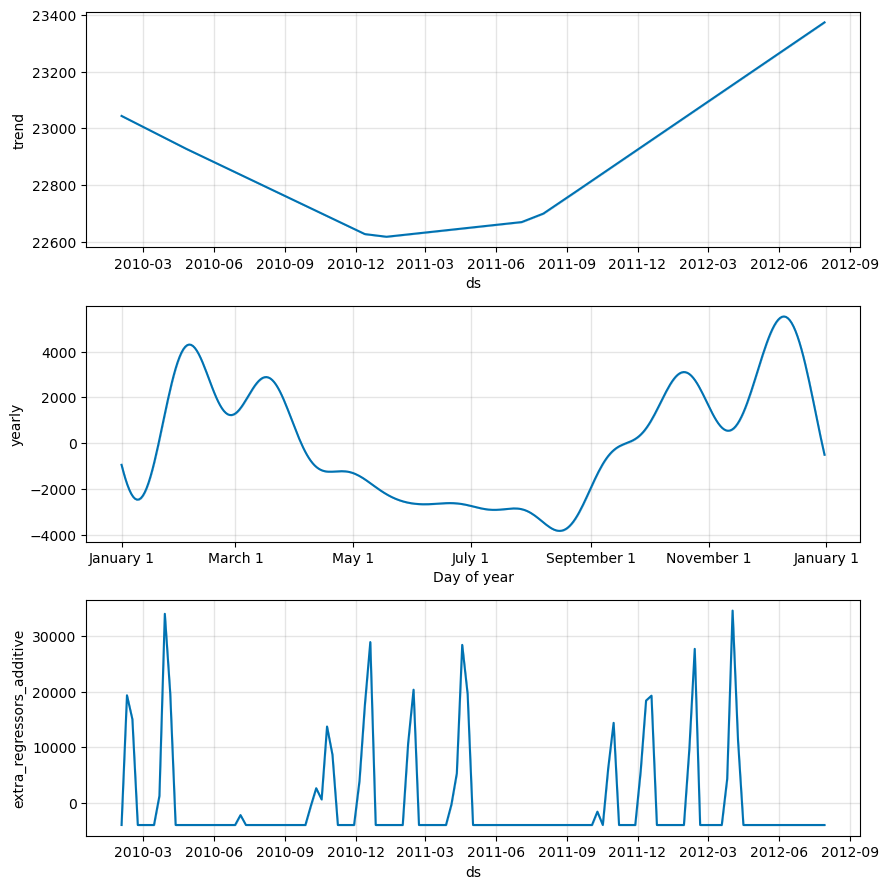

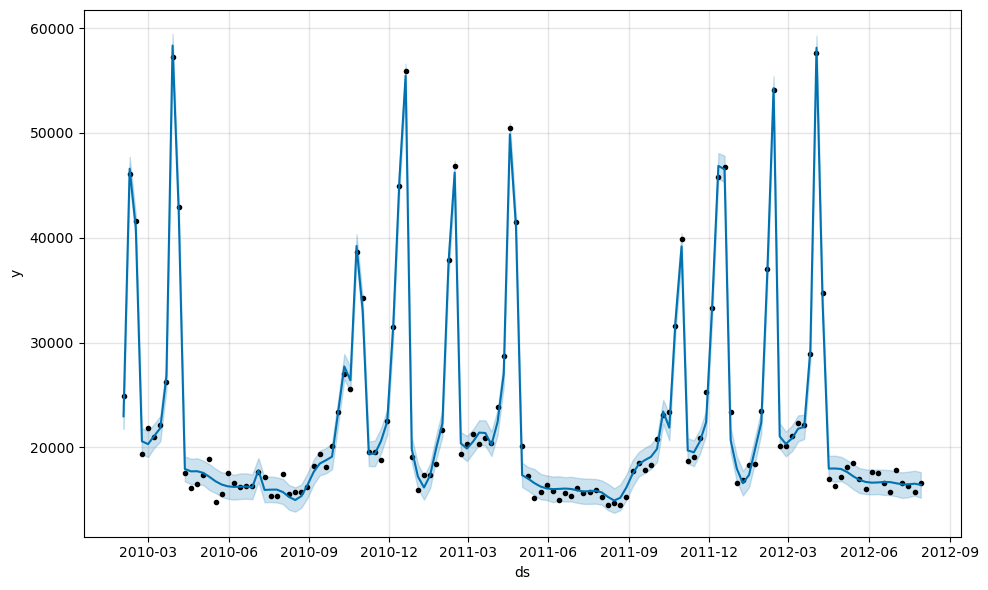

In [ ]:
#  過去データのフィッティング
df_fit = m.predict( df_train )

# フィッティング結果の可視化
fig1 = m.plot_components(df_fit)
fig2 = m.plot( df_fit )

In [ ]:
# 未来データの予測
df_predict = m.predict( df_test )
df_test['yhat'] = df_predict['yhat'].values

10236    11256.637423
Name: yhat, dtype: float64

## 店舗1の全ての部門を予測し、2012-07-30以前のデータで学習し、1週間先を予測

In [ ]:
dept_list = df_all[ df_all['store']==1 ]['dept'].unique()

all_result = []
for dept in dept_list:
    # データ準備
    df_train = df_all[ (df_all['week']<='2012-07-30') & 
                      (df_all['store']==1) & 
                      (df_all['dept']==dept)]
    df_train.rename(columns={'week':'ds','sales':'y'},inplace=True)

    df_test = df_all[ (df_all['week']>'2012-07-30') & 
                     (df_all['week']<='2012-08-06') &
                     (df_all['store']==1) & 
                     (df_all['dept']==dept)]
    df_test.rename(columns={'week':'ds','sales':'y'},inplace=True)
    
    ## 2年以上のデータがある場合のみモデルを学習
    if (df_train.shape[0] > 100) & ( df_test.shape[0] > 0 ):
        #モデルの学習
        m = prophet.Prophet(yearly_seasonality=True)
        m.add_regressor( 'promotion_sales' )
        m.fit( df_train )

        #予測結果
        df_predict = m.predict( df_test )
        df_test['yhat'] = df_predict['yhat'].values

        all_result.append( df_test )
all_result =pd.concat( all_result )
all_result

13:26:23 - cmdstanpy - INFO - Chain [1] start processing
13:26:23 - cmdstanpy - INFO - Chain [1] done processing
13:26:24 - cmdstanpy - INFO - Chain [1] start processing
13:26:24 - cmdstanpy - INFO - Chain [1] done processing
13:26:24 - cmdstanpy - INFO - Chain [1] start processing
13:26:24 - cmdstanpy - INFO - Chain [1] done processing
13:26:24 - cmdstanpy - INFO - Chain [1] start processing
13:26:24 - cmdstanpy - INFO - Chain [1] done processing
13:26:24 - cmdstanpy - INFO - Chain [1] start processing
13:26:24 - cmdstanpy - INFO - Chain [1] done processing
13:26:25 - cmdstanpy - INFO - Chain [1] start processing
13:26:25 - cmdstanpy - INFO - Chain [1] done processing
13:26:25 - cmdstanpy - INFO - Chain [1] start processing
13:26:25 - cmdstanpy - INFO - Chain [1] done processing
13:26:25 - cmdstanpy - INFO - Chain [1] start processing
13:26:25 - cmdstanpy - INFO - Chain [1] done processing
13:26:25 - cmdstanpy - INFO - Chain [1] start processing
13:26:25 - cmdstanpy - INFO - Chain [1]

,store,dept,ds,y,promotion_sales,yhat
131,1,1,2012-08-06,16119.92,0.000000,16042.618278
274,1,2,2012-08-06,46729.91,0.000000,47451.514089
417,1,3,2012-08-06,28257.30,16615.257808,27898.411711
560,1,4,2012-08-06,40343.83,0.000000,40305.008560
703,1,5,2012-08-06,18232.46,0.000000,16944.245770
846,1,6,2012-08-06,-139.65,0.000000,2987.941482
989,1,7,2012-08-06,16552.49,0.000000,16501.616764
1132,1,8,2012-08-06,37269.92,0.000000,36968.165639
1275,1,9,2012-08-06,20400.88,0.000000,22950.090144
1418,1,10,2012-08-06,33834.22,0.000000,32512.076781


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_sales_forecast(y_test, y_pred):
    """
    小売売上予測モデルの評価
    :param y_test: 実際の売上高（真値）
    :param y_pred: 予測売上高
    :return: 評価指標の辞書
    """
    metrics = {
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MAPE": np.mean(np.abs((y_test - y_pred) / (y_test + 1e-8))) * 100,  # 防止除以零
        "R2": r2_score(y_test, y_pred),
    }
    return metrics
# 評価指標を計算
results = evaluate_sales_forecast(all_result['yhat'], all_result['y'])
print(results)

{'MSE': 7677736.489479874, 'RMSE': 2770.8728750124706, 'MAE': 1293.0614136174677, 'MAPE': 18.686179519409734, 'R2': 0.9902529124471068}


# LightGBMアルゴリズムを使用した予測

In [11]:
import lightgbm as lgb

## 店舗1の部門1を予測し、2012-07-30以前のデータで学習し、1週間先を予測

In [12]:
df_sample = df_all[ (df_all['store']==1) & 
                  (df_all['dept']==1)].sort_values('week')

In [ ]:
# 特徴量の作成
feature_cols = []

## 第一の特徴量： 過去1週間の売上とプロモーション売上
df_sample['sales_lw'] = df_sample['sales'].shift(1)
df_sample['promotion_lw'] = df_sample['promotion_sales'].shift(1)
feature_cols = feature_cols + ['sales_lw', 'promotion_lw']

## 第二の特徴量： 前年同週の売上とプロモーション売上
df_sample['sales_ly'] = df_sample['sales'].shift(52)
df_sample['promotion_ly'] = df_sample['promotion_sales'].shift(52)
feature_cols = feature_cols + ['sales_ly', 'promotion_ly']

## 第三の特徴量： 予測対象週のプロモーション売上
feature_cols = feature_cols + ['promotion_sales']

## 全ての特徴量が欠損していないデータのみを使用
for col in feature_cols:
    df_sample = df_sample[ ~df_sample[col].isna() ]

In [ ]:
# 学習データと検証データの作成
x_train = df_sample[ df_sample['week']<='2012-07-30' ][ feature_cols ].values
y_train = df_sample[ df_sample['week']<='2012-07-30' ][ 'sales' ].values

x_test = df_sample[ df_sample['week']=='2012-08-06' ][ feature_cols ].values
y_test = df_sample[ df_sample['week']=='2012-08-06'  ][ 'sales' ].values

In [ ]:
# LightGBMで学習
from lightgbm.sklearn import LGBMRegressor

model = LGBMRegressor()
model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 79, number of used features: 3
[LightGBM] [Info] Start training from score 22596.330906
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMRegressor()

In [ ]:
# 予測
y_pred = model.predict( x_test )

In [17]:
y_pred, y_test

(array([16165.25781465]), array([16119.92]))

## 店舗1の全ての部門を予測し、2012-07-30以前のデータで学習し、1週間先を予測

In [18]:
df_sample = df_all[ (df_all['store']==1)].sort_values(['dept','week'])

In [ ]:
# 特徴量の構築
feature_cols = []

## 第一の特徴量： 過去データの最終週の売上とプロモーションによる売上金額
df_sample['sales_lw'] = df_sample.groupby(['dept'])['sales'].shift(1)
df_sample['promotion_lw'] = df_sample.groupby(['dept'])['promotion_sales'].shift(1)
feature_cols = feature_cols + ['sales_lw', 'promotion_lw']

## 第二の特徴量： 前のサイクル（つまり前年の同じ週）の売上とプロモーションによる売上金額
df_sample['sales_ly'] = df_sample.groupby(['dept'])['sales'].shift(52)
df_sample['promotion_ly'] = df_sample.groupby(['dept'])['promotion_sales'].shift(52)
feature_cols = feature_cols + ['sales_ly', 'promotion_ly']

## 第三の特徴量： 予測対象週のプロモーションによる売上金額
feature_cols = feature_cols + ['promotion_sales']

## すべての特徴量が空でないデータのみを保持
for col in feature_cols:
    df_sample = df_sample[ ~df_sample[col].isna() ]

In [ ]:
# 訓練データと検証データの作成
x_train = df_sample[ df_sample['week']<='2012-07-30' ][ feature_cols ].values
y_train = df_sample[ df_sample['week']<='2012-07-30' ][ 'sales' ].values

x_test = df_sample[ df_sample['week']=='2012-08-06' ][ feature_cols ].values
y_test = df_sample[ df_sample['week']=='2012-08-06'  ][ 'sales' ].values

In [ ]:
# lightGBMモデルの構築
model = LGBMRegressor()
model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 5547, number of used features: 5
[LightGBM] [Info] Start training from score 22390.628248


LGBMRegressor()

In [ ]:
# 予測
y_pred = model.predict( x_test )

In [23]:
y_pred, y_test

(array([ 15827.41919404,  46492.69038445,  33816.23715648,  38767.89005671,
         18651.50044702,   3007.55989147,  15723.48993843,  36569.28449712,
         22201.31808872,  32237.02102998,  25665.66996911,  11427.83049287,
         39267.89433303,  12809.91590551,  23056.1242317 ,   9415.96940694,
           893.43898638,   4313.50313049,   6611.0256935 ,   7329.36145893,
         20837.83094154,   7810.59937471,   8883.57350279,   4828.58999793,
           956.34503643,    362.19617876,   4384.56222533,   3335.2270923 ,
          4473.93186268,   5600.11983861,   8499.64189403,  11254.18765046,
          1941.91176181,   1327.42045054,   2698.46876661,  71375.85983846,
         53906.44281667,    420.61066405,   8576.46688884,   4353.24002767,
         19717.37652578,    526.81136791,  13935.96711862,   1600.15559869,
           204.92894605,   8153.33735333,   1222.09211416,   2779.01344178,
           544.60686348,    860.24273607,   5682.3938113 ,   3256.49984248,
         397

In [ ]:
# 評価指標の計
results = evaluate_sales_forecast(y_test, y_pred)
print(results)

{'MSE': 7769739.970638049, 'RMSE': 2787.4253300560445, 'MAE': 1464.9955793077177, 'MAPE': 49.13328434848239, 'R2': 0.9913330507133877}


- **Prophet（MAPE = 18.69%）** → 誤差が比較的小さい、R² = 0.9903、モデルの適合度は良好  
- **LightGBM（MAPE = 49.13%）** → 誤差が大きい、R² = 0.9913、過学習や特徴量の問題の可能性あり  

---

### **Prophet vs. LightGBM**  
**Prophet**  
- データに明確な **季節性・トレンド（周期的な変動）** がある場合（週ごと・月ごとの売上パターンが存在する）  
- **解釈性が必要** な場合（トレンド、季節性、祝日効果などを分解したい）  
- 計算資源が限られている場合（Prophet は計算が軽く、ハイパーパラメータ調整も比較的簡単）  

**LightGBM**  
- データが **プロモーション、在庫、天気などの外部要因** に大きく影響される場合（Prophet は時間依存の予測がメイン）  
- 多様な特徴量（プロモーション、祝日、割引率、価格など）を活用したい場合  
- 大量のデータを持っており、ハイパーパラメータの調整による改善が可能な場合  

---

### **Prophet の最適化方法**
1. **プロモーション・祝日効果を追加**  
   ```python
   from fbprophet import Prophet

   # プロモーション・祝日データの作成
   holidays = pd.DataFrame({
       'holiday': 'promotion',
       'ds': ['2023-11-11', '2023-12-25', '2024-01-01'],  # プロモーション日を追加
       'lower_window': 0,
       'upper_window': 1
   })

   # Prophet モデルの作成
   model = Prophet(holidays=holidays, seasonality_mode='multiplicative')
   model.add_seasonality(name='weekly', period=7, fourier_order=3)  # 週ごとの季節性を強化
   model.fit(df)
   ```

2. **季節性の調整**
   - `seasonality_mode='multiplicative'`（売上データに適している）  
   - `add_seasonality(name='monthly', period=30.5, fourier_order=5)`  

3. **予測の不安定性を抑える**
   - `changepoint_prior_scale=0.05`（デフォルト 0.05、過学習を抑える）  
   - `holidays_prior_scale=10`（プロモーションの影響を強化）  

---

### **LightGBM の最適化方法**
1. **ハイパーパラメータの調整（過学習を抑え、MAPE を改善）**  
   ```python
   from sklearn.model_selection import GridSearchCV

   param_grid = {
       'num_leaves': [31, 50, 100],  
       'learning_rate': [0.01, 0.05, 0.1],  
       'n_estimators': [100, 500, 1000],  
       'max_depth': [-1, 10, 20],  
       'min_child_samples': [10, 20, 50]
   }

   model = LGBMRegressor()
   grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
   grid_search.fit(X_train, y_train)

   print("最適なパラメータ:", grid_search.best_params_)
   ```

2. **重要な特徴量の追加**
   - **時間系特徴量**（`dayofweek`、`weekofyear`、`month`）  
   - **プロモーション関連特徴量**（プロモーション実施フラグ `is_promotion`、割引率 `discount_rate`）  
   - **過去の売上データ（ラグ特徴量）**（`sales_last_7d`、`sales_last_30d`）  
   - **外部要因**（天気、在庫状況、価格）  

3. **正則化を導入**
   - `lambda_l1=0.1, lambda_l2=0.1`（過学習を防ぐ）  
   - `min_child_samples=20`（リーフノードが小さくなりすぎるのを防ぐ）  

---

### **結論**
- **トレンドや季節性が強い場合は Prophet** （ただしプロモーションの影響を追加する必要がある）  
- **プロモーション・在庫・価格などの影響が大きい場合は LightGBM**（ただし特徴量設計とパラメータ最適化が必須）  
- **Prophet + LightGBM のハイブリッド手法**（Prophet でトレンドを予測し、LightGBM で誤差補正）も可能  